In [15]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import pickle as pkl
# import notebook_helper
import sys
import numpy as np
import imodelsx
import imodelsx.process_results
import sasc.data.data
from sasc.data.data import TASKS_D3
import warnings
import scipy.stats
def sem(x):
    '''Compute standard error of the mean, ignoring NaNs
    '''
    with warnings.catch_warnings():
        return scipy.stats.sem(x, ddof=0)
tqdm.pandas()
TASK_NAMES = list(TASKS_D3.keys())
sys.path.append('../experiments/')
# results_dir = '/home/chansingh/mntv1/mprompt/feb18_synthetic_sweep'
results_dir = '/home/chansingh/mntv1/mprompt/feb25'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
r = pd.read_pickle('../results/sasc/results_synthetic.pkl')

In [17]:
# simplifying
default_params = {
    'noise_ngram_scores': 0,
    'module_num_restrict': -1,
}
rd = r
for k, v in default_params.items():
    rd = rd[rd[k] == v]

# Top results

In [18]:
with pd.option_context('display.max_colwidth', None, 'display.max_rows', 200):
    d = (
        rd[[
            'task_keyword', 'top_explanation_init_strs',
            'top_contains_keywords',  # 'mean_contains_keywords',
            'top_score_synthetic', 'module_num', 'seed'
        ]]
        .rename(columns={
            'task_keyword': 'GT Explanation',
            'top_explanation_init_strs': 'Generated Explanation',
        })
    )
    d_ = d[d.top_contains_keywords == 0]
    slice_ = pd.IndexSlice[d_.index, d_.columns]

    # s = d.style
    display(
        d
        .style.hide()
        .set_properties(**{'background-color': '#132639'}, subset=slice_)
        .format(precision=2)
    )

GT Explanation,Generated Explanation,top_contains_keywords,top_score_synthetic,module_num,seed
Hillary,hillary clinton,True,0.57,17,2
Hillary,hillary clinton,True,0.57,16,2
Hillary,name hillary or hillary clinton,True,0.53,17,1
Hillary,name hillary or hillary clinton,True,0.53,17,3
evacuation,"concept of evacuation, or the process of leaving a place in an emergency situation",True,0.47,5,1
Hillary,person hillary clinton,True,0.44,16,3
atheistic,belief system of atheism,True,0.42,4,2
abortion,topic of abortion,True,0.40,21,2
abortion,topic of abortion,True,0.40,21,3
abortion,topic of abortion,True,0.40,21,1


# Details

**Selected examples**

In [19]:
pos_examples = [(25, 2), (4, 1), (21, 1), (42, 1), (7, 1),
                (50, 1), (41, 1), (8, 1), (45, 1), (47, 1)]
neg_examples = [(18, 1), (26, 1), (39, 1), (2, 1)]

with pd.option_context('display.max_colwidth', None, 'display.max_rows', 200):
    tab = (
        pd.concat([rd[(rd.module_num == x[0]) & (rd.seed == x[1])]
                  for x in pos_examples + neg_examples])
        [[
            'task_keyword', 'top_explanation_init_strs',
        ]]
        .rename(columns={
                'task_keyword': 'Groundtruth Explanation',
                'top_explanation_init_strs': 'Generated Explanation',
                })
    )
    display(tab)
dummy = [''] * tab.shape[0]
dummy[0] = '\\parbox[c]{1mm}{\\multirow{' + \
    str(len(pos_examples)) + '}{*}{\\rotatebox[origin=c]{90} {Correct}}}'
dummy[len(pos_examples)] = '\\parbox[c]{1mm}{\\multirow{' + str(
    len(neg_examples)) + '}{*}{\\rotatebox[origin=c]{90} {Incorrect}}}'
tab.insert(0, ' ', dummy)
print(tab.style.hide(axis="index").to_latex(hrules=True).replace(
    'science \\\\', 'science \\\\ \n\midrule'))

<>:25: DeprecationWarning: invalid escape sequence '\m'
<>:25: DeprecationWarning: invalid escape sequence '\m'
/tmp/ipykernel_147091/1985051738.py:25: DeprecationWarning: invalid escape sequence '\m'
  'science \\\\', 'science \\\\ \n\midrule'))


,Groundtruth Explanation,Generated Explanation
312,math,mathematics
347,atheistic,"atheism and related topics, such as theism, religious beliefs, and atheists"
398,abortion,topic of abortion
260,environmentalism,environmentalism and climate action
23,crime,crime and criminal activity
358,sports,sports
114,definition,defining or explaining something
289,shelter,concept of shelter
445,facts,information or knowledge
161,science,science


\begin{tabular}{lll}
\toprule
  & Groundtruth Explanation & Generated Explanation \\
\midrule
\parbox[c]{1mm}{\multirow{10}{*}{\rotatebox[origin=c]{90} {Correct}}} & math & mathematics \\
 & atheistic & atheism and related topics, such as theism, religious beliefs, and atheists \\
 & abortion & topic of abortion \\
 & environmentalism & environmentalism and climate action \\
 & crime & crime and criminal activity \\
 & sports & sports \\
 & definition & defining or explaining something \\
 & shelter & concept of shelter \\
 & facts & information or knowledge \\
 & science & science \\ 
\midrule
\parbox[c]{1mm}{\multirow{4}{*}{\rotatebox[origin=c]{90} {Incorrect}}} & derogatory & negative language and criticism \\
 & ungrammatical & language \\
 & entity & enterprise, estate, and creatures \\
 & subjective & art and expression \\
\bottomrule
\end{tabular}



**More details**

In [20]:
# display full strings
with pd.option_context('display.max_colwidth', None, 'display.max_rows', 200):
    display(
        rd
        .filter(['task_keyword', 'top_explanation_init_strs', 'top_contains_keywords', 'top_score_synthetic', 'module_num'])
        # .filter(['top_score_contains_keywords', 'top_score_synthetic', 'top_explanation_init_strs', 'explanation_init_ngrams', 'module_num'])
        # .filter(['top_explanation_init_strs', 'explanation_init_ngrams', 'top_strs_added'])
        # .filter(['explanation_init_strs', 'explanation_init_ngrams',])
        # .head(n=20)
    )

,task_keyword,top_explanation_init_strs,top_contains_keywords,top_score_synthetic,module_num
367,Hillary,hillary clinton,True,0.570,17
334,Hillary,hillary clinton,True,0.570,16
408,Hillary,name hillary or hillary clinton,True,0.532,17
49,Hillary,name hillary or hillary clinton,True,0.532,17
181,evacuation,"concept of evacuation, or the process of leaving a place in an emergency situation",True,0.471,5
187,Hillary,person hillary clinton,True,0.439,16
410,atheistic,belief system of atheism,True,0.420,4
292,abortion,topic of abortion,True,0.403,21
438,abortion,topic of abortion,True,0.403,21
398,abortion,topic of abortion,True,0.403,21


# Extra evaluation

### Export regexes

In [21]:
from sasc.data.d3 import TASKS_D3

In [22]:
with pd.option_context('display.max_colwidth', None, 'display.max_rows', 200):
    cols = {'index': 'Module name',
            'groundtruth_explanation': 'Dataset explanation', 'check_func': 'Regex check'}
    d = pd.DataFrame(TASKS_D3).T.reset_index()[
        cols.keys()].rename(columns=cols)
    d['Module name'] = d['Module name'].apply(
        lambda x: x.replace('d3_', '').replace('_', '-'))
    print(d.to_latex(index=False).replace('|', '$|$'))

\begin{tabular}{lll}
\toprule
Module name & Dataset explanation & Regex check \\
\midrule
0-irony & contains irony & irony$|$sarcas \\
1-objective & is a more objective description of what happened & objective$|$factual$|$nonpersonal$|$neutral$|$unbias \\
2-subjective & contains subjective opinion & subjective$|$opinion$|$personal$|$bias \\
3-god & believes in god & god$|$religious$|$religion \\
4-atheism & is against religion & atheism$|$atheist$|$anti-religion$|$against religion \\
5-evacuate & involves a need for people to evacuate & evacuat$|$flee$|$escape \\
6-terorrism & describes a situation that involves terrorism & terorrism$|$terror \\
7-crime & involves crime & crime$|$criminal$|$criminality \\
8-shelter & describes a situation where people need shelter & shelter$|$home$|$house \\
9-food & is related to food security & food$|$hunger$|$needs \\
10-infrastructure & is related to infrastructure & infrastructure$|$buildings$|$roads$|$bridges$|$build \\
11-regime change & describ

### Analyze simiilaries with GT explanations

In [23]:
rd1 = rd[rd.seed == 1]
rd1 = rd1[['top_explanation_init_strs', 'task_keyword',
           'task_name (groundtruth)', 'module_num']].sort_values(by='module_num')
rd1

,top_explanation_init_strs,task_keyword,task_name (groundtruth),module_num
240,sarcasm,sarcasm,irony,0
446,adjectives to describe something,unbiased,objective,1
282,art and expression,subjective,subjective,2
243,religion,religious,god,3
347,"atheism and related topics, such as theism, re...",atheistic,atheism,4
181,"concept of evacuation, or the process of leavi...",evacuation,evacuate,5
0,terrorism,terrorism,terorrism,6
23,crime and criminal activity,crime,crime,7
289,concept of shelter,shelter,shelter,8
231,hunger,hunger,food,9


In [24]:
# generate similarity matrix of explanations and groundtruth texts using bge-large
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('BAAI/bge-reranker-large')
model = AutoModelForSequenceClassification.from_pretrained(
    'BAAI/bge-reranker-large')
model.eval()

texts_gen = rd1['top_explanation_init_strs'].values.tolist()
texts_gt = rd1['task_keyword'].values.tolist()
n = len(texts_gen)
pairs = []
for r in range(n):
    for c in range(n):
        pairs.append([texts_gen[r], texts_gt[c]])

# pairs = [pairs1[:3], pairs2[:3]]
# pairs = [['sarcasm', 'sarcasm'],
        #  ['sarcasm', 'unbiased']]
# pairs = [['what is panda?', 'hi'], ['what is panda?',
# 'The giant panda (Ailuropoda melanoleuca), sometimes called a panda bear or simply panda, is a bear species endemic to China.']]


with torch.no_grad():
    inputs = tokenizer(pairs, padding=True, truncation=True,
                       return_tensors='pt', max_length=512)
    scores = model(**inputs, return_dict=True).logits.view(-1, ).float()
out = scores.reshape((n, n))

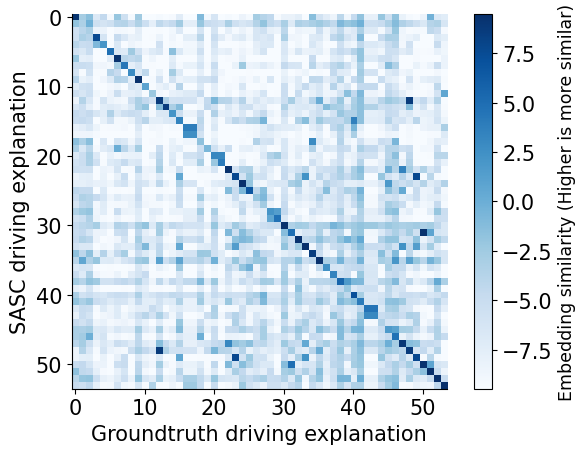

In [28]:
plt.imshow(out, cmap='Blues')
cb = plt.colorbar()
cb.set_label(
    label='Embedding similarity (Higher is more similar)', size='small')
plt.ylabel('SASC driving explanation')
plt.xlabel('Groundtruth driving explanation')
plt.tight_layout()
plt.savefig('synthetic_scores_sim_matrix.pdf', bbox_inches='tight')
plt.show()

In [ ]:
# calculate top-k acc, accounting for ties
for k in [1, 2]:
    correct_count = 0
    for c in range(n):
        unique_vals = np.unique(out[:, c])[::-1]
        val_diag = out[c, c]
        if val_diag >= unique_vals[k - 1]:
            correct_count += 1
    print('top' + str(k) + '-acc', correct_count / n)

# Evaluating all texts rather than negative texts

In [ ]:
rd1 = rd[rd.seed == 1]
rd1 = rd1.sort_values(by='module_num')
n = len(rd1)

In [ ]:
from sasc.modules.emb_diff_module import EmbDiffModule
from sasc.data.d3 import TASKS_D3
from collections import defaultdict

d = defaultdict(list)

# initialize model
m = EmbDiffModule(
    task_str='d3_0_irony',
)

for i in tqdm(range(n)):

    # load module
    row = rd1.iloc[i]
    task_str = list(TASKS_D3.keys())[row['module_num']]
    m._init_task(task_str)

    assert abs(
        (np.mean(m(row['top_strs_added'])) -
         np.mean(m(row['top_strs_removed']))
         )
        - row['top_score_synthetic']) < 1e-1

    for j in range(n):
        row_eval = rd1.iloc[j]

        d['i'].append(i)
        d['j'].append(j)
        d['score_added'].append(m(row_eval['top_strs_added']))
        d['score_removed'].append(m(row_eval['top_strs_removed']))

In [133]:
df = pd.DataFrame(d)
df['added'] = df['score_added'].apply(lambda x: np.mean(x))
df['removed'] = df['score_removed'].apply(lambda x: np.mean(x))
df

,i,j,score_added,score_removed,added,removed
0,0,0,"[-0.8811241507071529, -0.916004910130155, -0.8...","[-0.982652681765082, -0.9997531693526941, -1.0...",-0.834726,-1.007341
1,0,1,"[-0.9630515176418337, -0.9451296524030018, -0....","[-1.0183531112006246, -0.9859219019264988, -0....",-0.958424,-0.959225
2,0,2,"[-0.9843971009246647, -1.0575905282493918, -0....","[-1.0528231069604783, -1.0420089717950722, -0....",-1.005829,-1.043729
3,0,3,"[-1.0398598236814456, -1.00354692795573, -1.04...","[-1.066462149227688, -1.003821070523948, -1.06...",-1.037695,-1.052938
4,0,4,"[-0.9995324531867431, -0.975631186835391, -0.9...","[-1.0928068691044965, -1.0675976561762064, -0....",-0.997451,-1.045948
...,...,...,...,...,...,...
2911,53,49,"[-1.1208926528057186, -1.1023942393748818, -1....","[-1.1217431925677406, -1.1010811437605679, -1....",-1.081838,-1.090783
2912,53,50,"[-1.051554698576432, -1.0740868425822105, -1.0...","[-1.0966302323618708, -1.1153290903326747, -1....",-1.075268,-1.090063
2913,53,51,"[-1.0896496873925383, -1.1035806158026826, -1....","[-1.0458627404619119, -1.0534974663964298, -1....",-1.057495,-0.915106
2914,53,52,"[-1.0787639181765822, -1.054626091907554, -1.0...","[-1.0940296470858009, -1.104074264429083, -1.1...",-1.047607,-1.091940


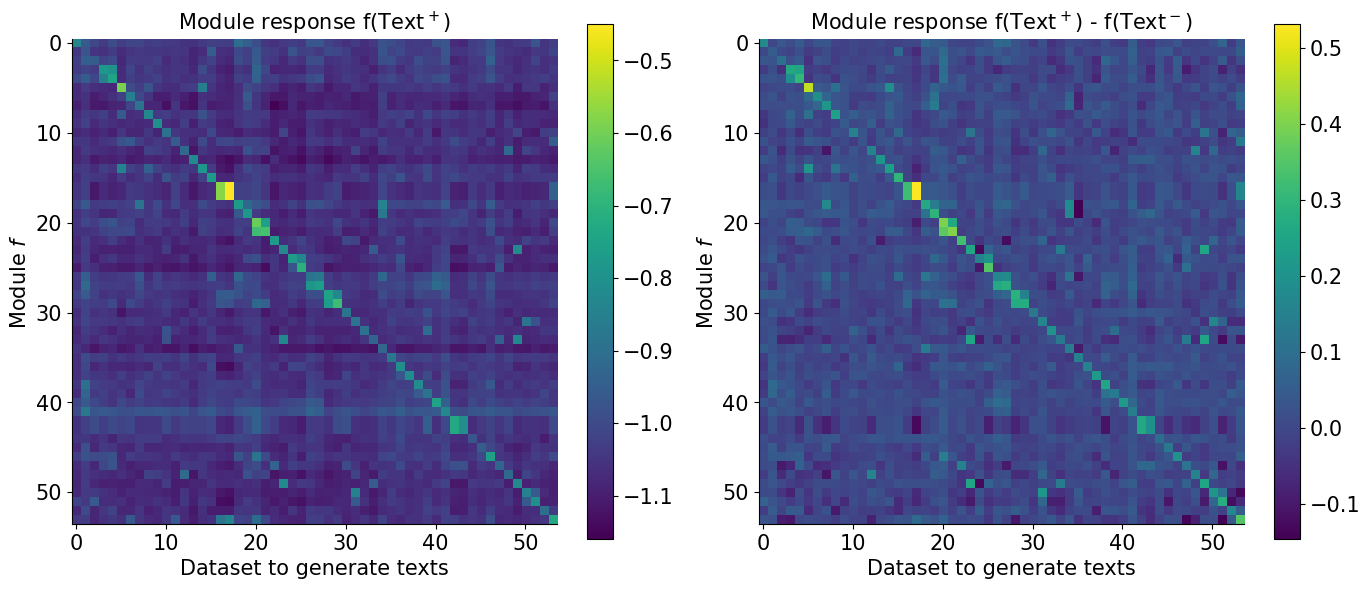

In [178]:
added = df['added'].values.reshape((n, n))
removed = df['removed'].values.reshape((n, n))

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(added)
plt.ylabel('Module $f$')
plt.xlabel('Dataset to generate texts')
plt.title('Module response f(Text$^+$)', fontsize='medium')
plt.colorbar()

plt.subplot(1, 2, 2)

plt.imshow(added - removed)
plt.ylabel('Module $f$')
plt.xlabel('Dataset to generate texts')
plt.title('Module response f(Text$^+$) - f(Text$^-$)', fontsize='medium')
plt.colorbar()
plt.savefig('mod_response_synthetic.pdf', bbox_inches='tight')
plt.show()

In [177]:
# subtract diag mean from non-diag mean
print('orig', added[np.eye(n).astype(bool)].mean() -
      added[~np.eye(n).astype(bool)].mean())

diff = added - removed
print('diff', diff[np.eye(n).astype(bool)].mean())

orig 0.23763210418647707
diff 0.22060064169403173
